In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [23]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target

In [24]:
X = data.drop('Price', axis=1).head(100)
y = data['Price'].head(100)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


SVR (линейное ядро):
R²: 0.6326
MAE: 0.3927
MSE: 0.3563


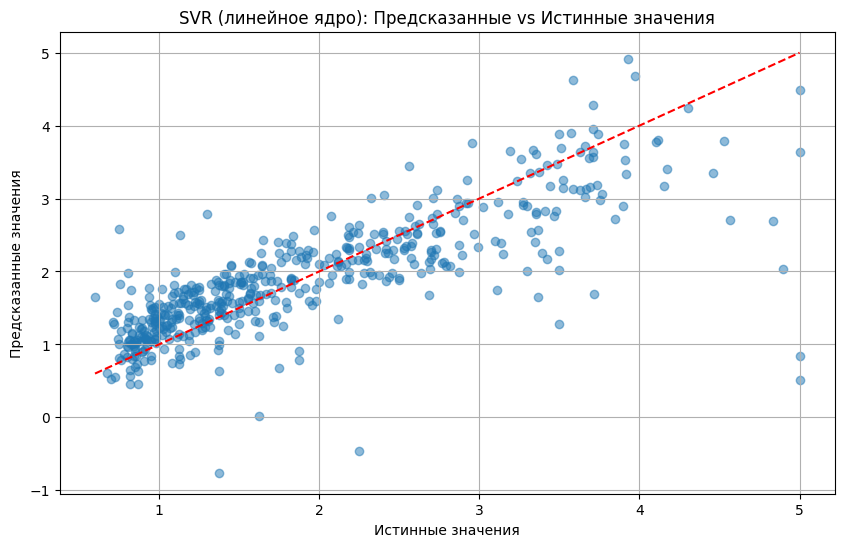


SVR (гауссово ядро):
R²: -0.0806
MAE: 0.7695
MSE: 1.0480


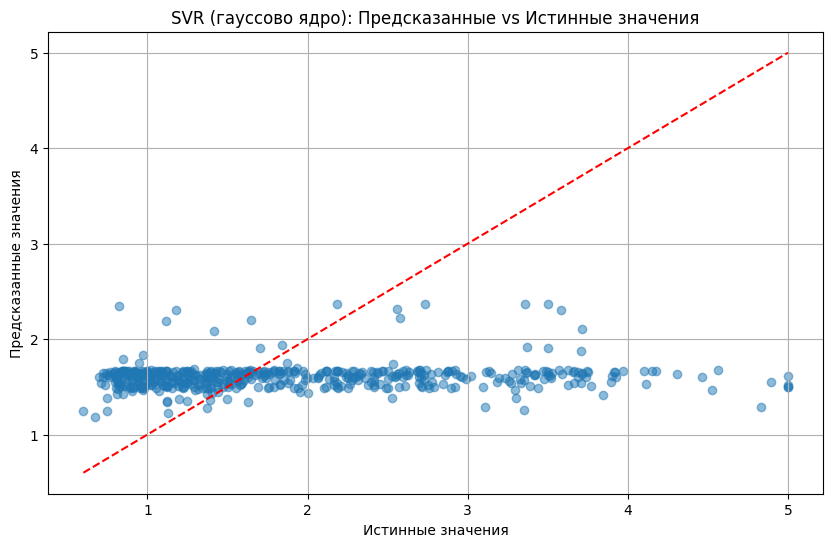


SVR (полиномиальное ядро 2-й степени):
R²: -0.0936
MAE: 0.7804
MSE: 1.0606


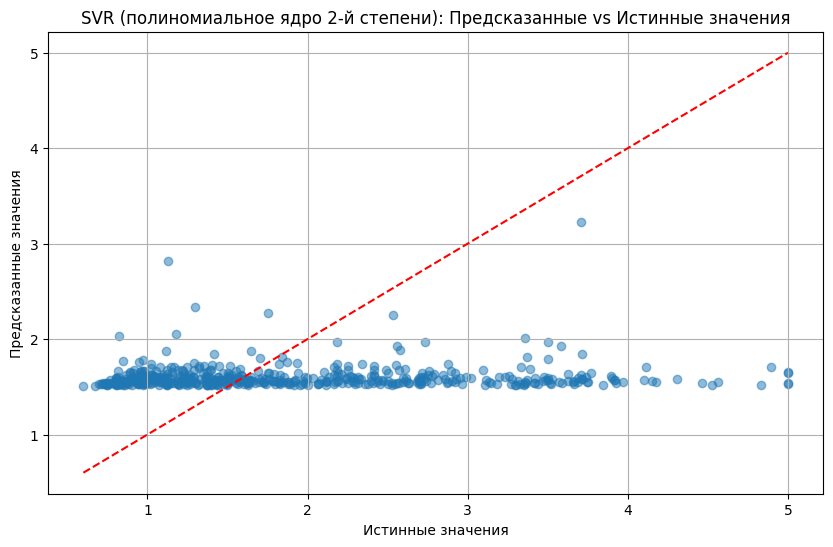


KNN (5 соседей):
R²: 0.2598
MAE: 0.6683
MSE: 0.7178


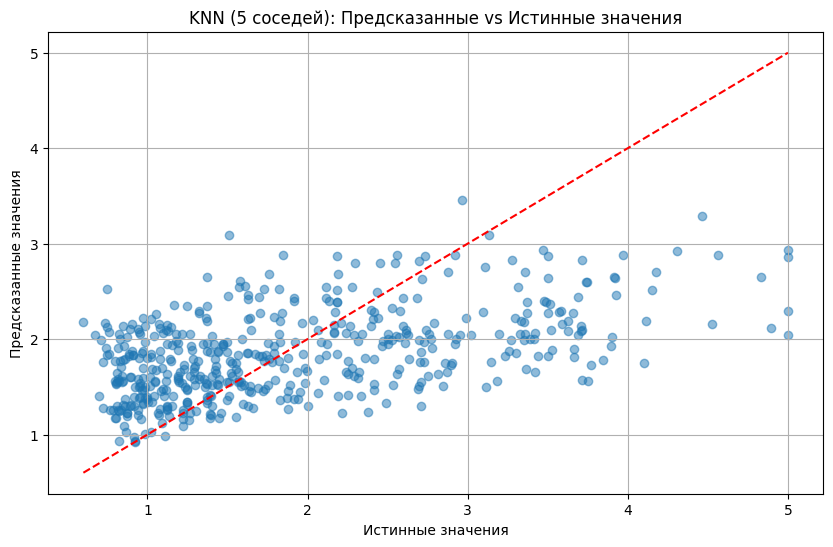


MLP (1 скрытый слой):
R²: 0.5723
MAE: 0.4876
MSE: 0.4147


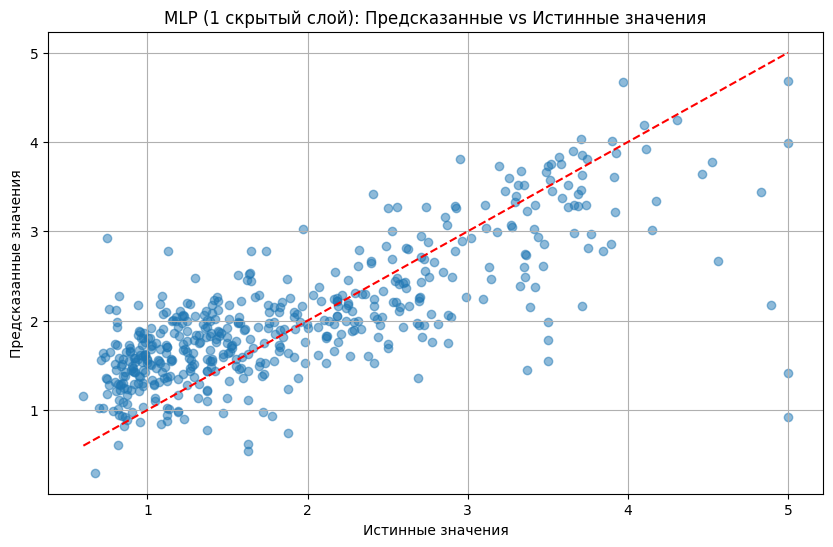


Дерево решений (глубина=5):
R²: 0.8736
MAE: 0.2548
MSE: 0.1226


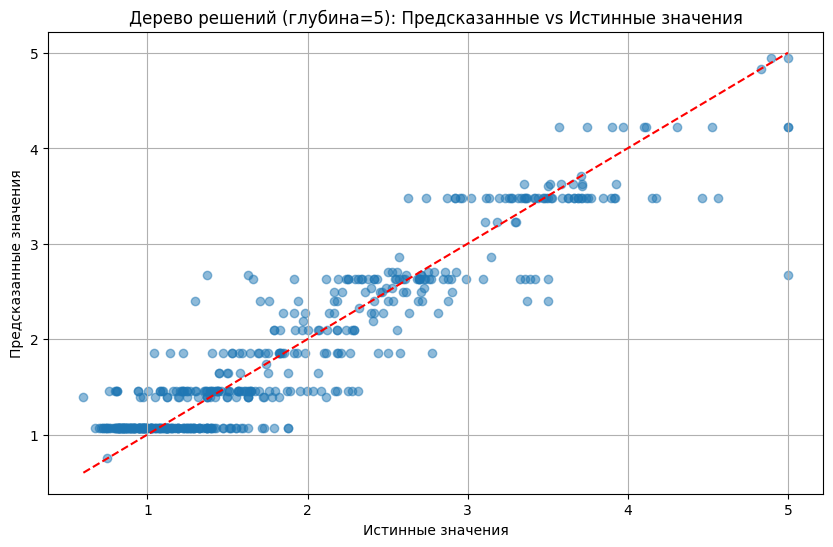


Гребневая регрессия:
R²: 0.6771
MAE: 0.3926
MSE: 0.3132


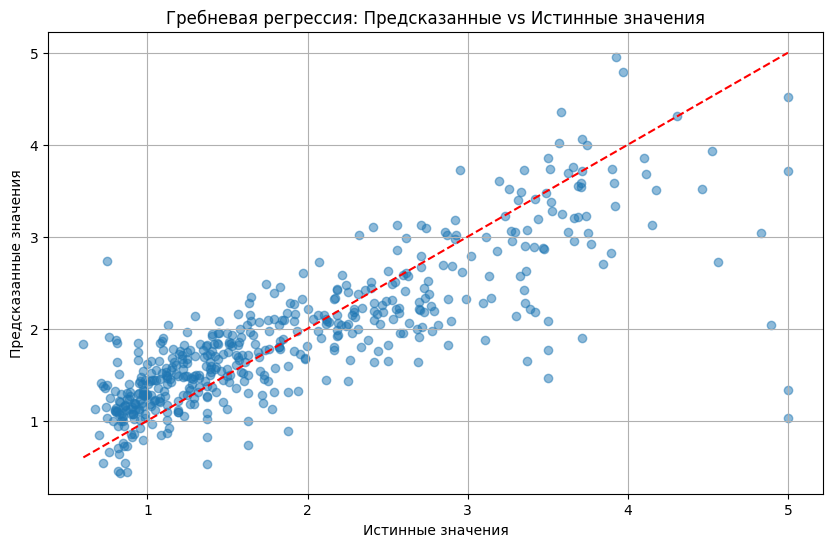


Lasso регрессия:
R²: 0.5704
MAE: 0.4807
MSE: 0.4166


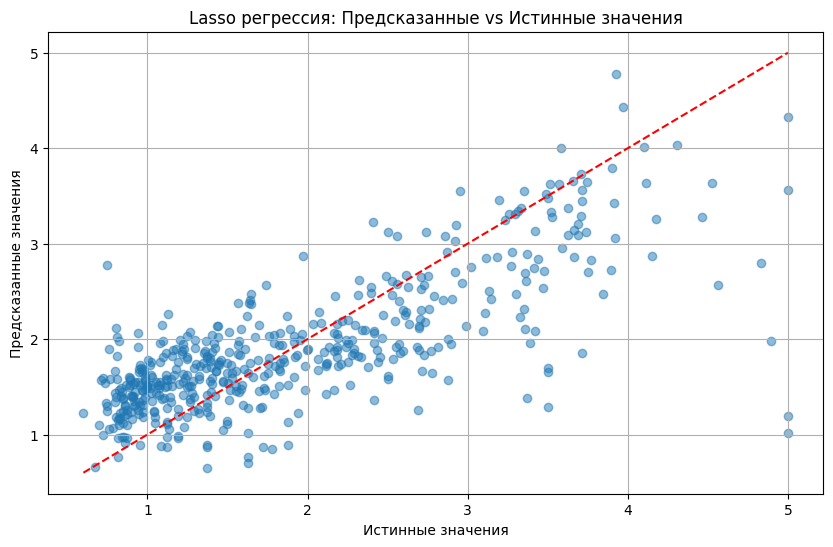


ElasticNet:
R²: 0.5806
MAE: 0.4675
MSE: 0.4068


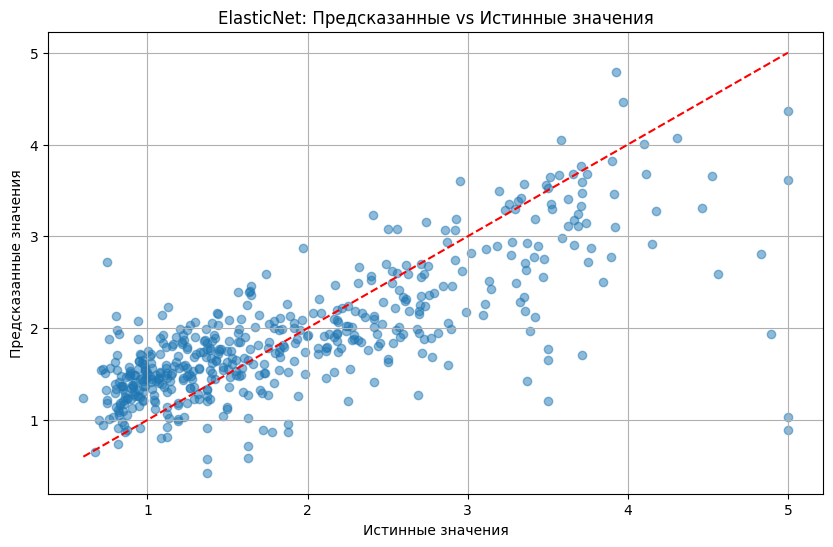


Случайный лес (100 деревьев):
R²: 0.9727
MAE: 0.0986
MSE: 0.0265


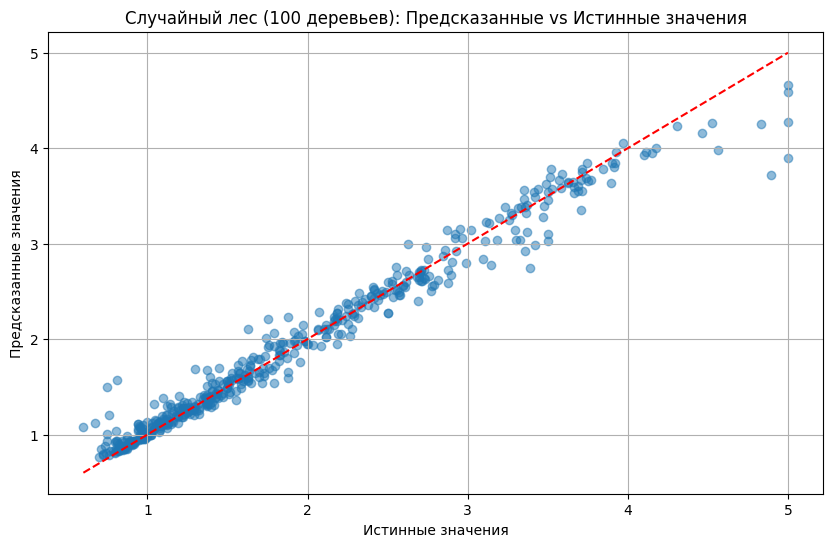


Бэггинг (10 оценщиков):
R²: 0.9621
MAE: 0.1151
MSE: 0.0368


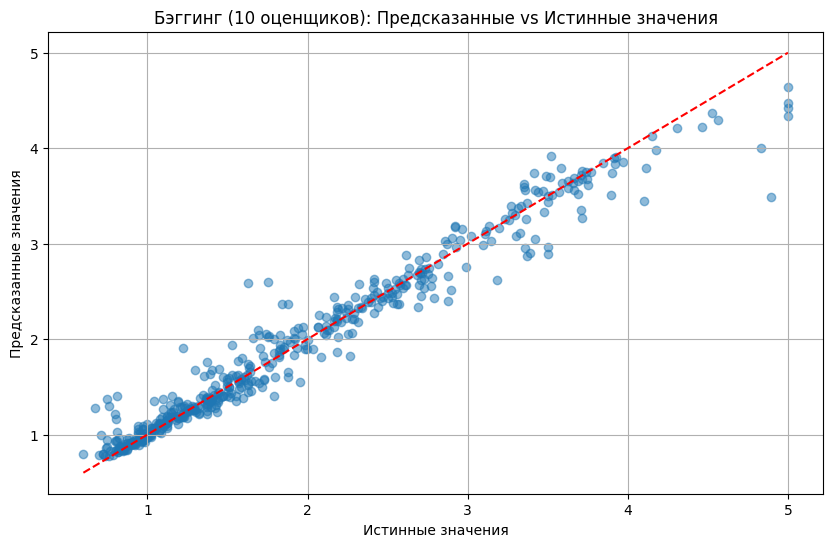

In [26]:
X = data.drop('Price', axis=1).head(500)
y = data['Price'].head(500)

def evaluate_model(model, model_name):
    model.fit(X, y)
    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    print(f"\n{model_name}:")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.title(f'{model_name}: Предсказанные vs Истинные значения')
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.grid(True)
    plt.show()

# 1. Метод опорных векторов
evaluate_model(SVR(kernel='linear'), "SVR (линейное ядро)")
evaluate_model(SVR(kernel='rbf'), "SVR (гауссово ядро)")
evaluate_model(SVR(kernel='poly', degree=2), "SVR (полиномиальное ядро 2-й степени)")

# 2. Метод ближайших соседей
evaluate_model(KNeighborsRegressor(n_neighbors=5), "KNN (5 соседей)")

# 3. Многослойный перцептрон
evaluate_model(MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000), "MLP (1 скрытый слой)")

# 4. Дерево решений
evaluate_model(DecisionTreeRegressor(max_depth=5), "Дерево решений (глубина=5)")

# 5. Регуляризованные модели
evaluate_model(Ridge(alpha=1.0), "Гребневая регрессия")
evaluate_model(Lasso(alpha=0.1), "Lasso регрессия")
evaluate_model(ElasticNet(alpha=0.1, l1_ratio=0.5), "ElasticNet")

# 6. Другие методы
evaluate_model(RandomForestRegressor(n_estimators=100), "Случайный лес (100 деревьев)")
evaluate_model(BaggingRegressor(n_estimators=10), "Бэггинг (10 оценщиков)")

In [27]:
def evaluate_all_models(X, y):
    models = [
        ("SVR (линейное ядро)", SVR(kernel='linear')),
        ("SVR (RBF ядро)", SVR(kernel='rbf')),
        ("SVR (полином 2-й степени)", SVR(kernel='poly', degree=2)),
        ("KNN (5 соседей)", KNeighborsRegressor(n_neighbors=5)),
        ("MLP (1 скрытый слой)", MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)),
        ("Дерево решений (глубина=5)", DecisionTreeRegressor(max_depth=5)),
        ("Гребневая регрессия", Ridge(alpha=1.0)),
        ("Lasso регрессия", Lasso(alpha=0.1)),
        ("ElasticNet", ElasticNet(alpha=0.1, l1_ratio=0.5)),
        ("Случайный лес (100 деревьев)", RandomForestRegressor(n_estimators=100)),
        ("Бэггинг (10 оценщиков)", BaggingRegressor(n_estimators=10))
    ]
    results = []
    for model_name, model in models:
        model.fit(X, y)
        y_pred = model.predict(X)

        r2 = r2_score(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)

        results.append({
            "Модель": model_name,
            "R²": round(r2, 4),
            "MAE": round(mae, 4),
            "MSE": round(mse, 4)
        })

    results_df = pd.DataFrame(results)
    return results_df.sort_values(by="R²", ascending=False)

X = data.drop('Price', axis=1).head(500)
y = data['Price'].head(500)
results = evaluate_all_models(X, y)
print(results)

                          Модель      R²     MAE     MSE
9   Случайный лес (100 деревьев)  0.9709  0.0990  0.0282
10        Бэггинг (10 оценщиков)  0.9660  0.1087  0.0330
5     Дерево решений (глубина=5)  0.8736  0.2548  0.1226
6            Гребневая регрессия  0.6771  0.3926  0.3132
0            SVR (линейное ядро)  0.6326  0.3927  0.3563
8                     ElasticNet  0.5806  0.4675  0.4068
7                Lasso регрессия  0.5704  0.4807  0.4166
4           MLP (1 скрытый слой)  0.5151  0.5272  0.4703
3                KNN (5 соседей)  0.2598  0.6683  0.7178
1                 SVR (RBF ядро) -0.0806  0.7695  1.0480
2      SVR (полином 2-й степени) -0.0936  0.7804  1.0606


Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [37]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

data = pd.DataFrame(california.data, columns = california.feature_names)
data['Target'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
X = data.drop('Target', axis=1).head(100)
y = data['Target'].head(100)

results = evaluate_all_models(X, y)
print(results)

                          Модель        R²      MAE       MSE
9   Случайный лес (100 деревьев)    0.9400   0.1077    0.0378
10        Бэггинг (10 оценщиков)    0.9366   0.1114    0.0399
5     Дерево решений (глубина=5)    0.9333   0.1481    0.0420
6            Гребневая регрессия    0.4592   0.3711    0.3404
8                     ElasticNet    0.4334   0.3737    0.3566
0            SVR (линейное ядро)    0.4223   0.3572    0.3636
7                Lasso регрессия    0.4089   0.3904    0.3720
3                KNN (5 соседей)    0.1728   0.5365    0.5207
1                 SVR (RBF ядро)   -0.0141   0.5115    0.6383
2      SVR (полином 2-й степени)   -0.0419   0.5257    0.6558
4           MLP (1 скрытый слой) -594.8297  14.5221  375.0292
